In [37]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [21]:
# Создание пути к директории данных
data_dir_path = os.path.join('data-2')
data_files = os.listdir(data_dir_path)

# Проверьте список файлов
print(data_files)  # ['data_2d.csv', 'mnist.csv']

['data_2d.csv', 'mnist.csv']


In [25]:
# Завантаження двовимірного датасету
data_file_path_2d = os.path.join(data_dir_path, 'data_2d.csv')
df_2d = pd.read_csv(data_file_path_2d)

print(df_2d.head())

   0.000000000000000000e+00  -7.687164597386728637e-01  \
0                       0.0                   2.687848   
1                       0.0                  -0.201379   
2                       0.0                   0.608496   
3                       0.0                  -0.082282   
4                       0.0                   2.083069   

   4.608603078297135447e-01  
0                  2.366961  
1                  0.470430  
2                  1.225400  
3                  1.137218  
4                  2.694482  


In [26]:
# Стандартизація даних

scaler = StandardScaler()
X_2d = scaler.fit_transform(df_2d)

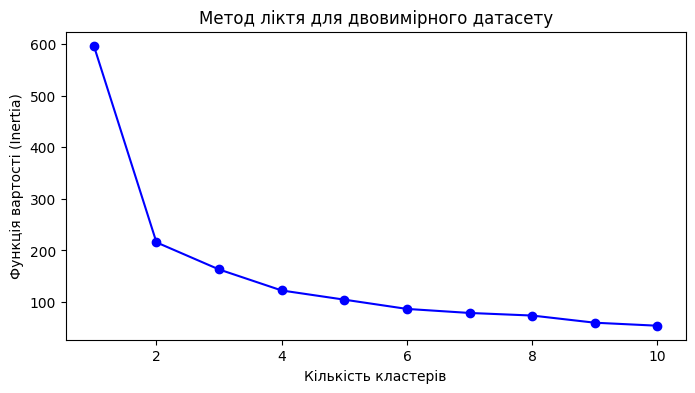

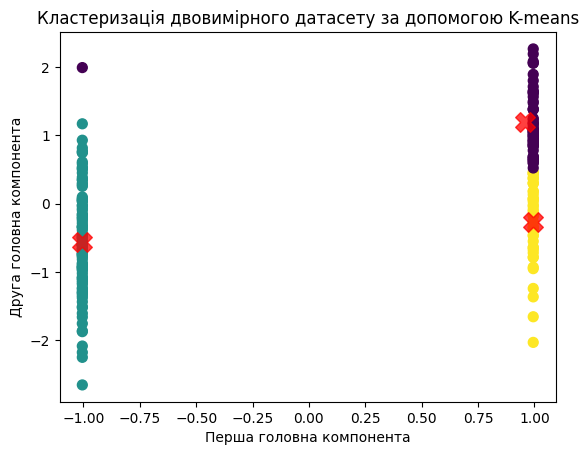

In [30]:
# Використання методу "ліктя" для визначення оптимальної кількості кластерів
distortions = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_2d)
    distortions.append(kmeans.inertia_)

# Побудова графіка "ліктя"
plt.figure(figsize=(8, 4))
plt.plot(K, distortions, 'bo-')
plt.xlabel('Кількість кластерів')
plt.ylabel('Функція вартості (Inertia)')
plt.title('Метод ліктя для двовимірного датасету')
plt.show()

# Вибір оптимальної кількості кластерів (наприклад, 3)
kmeans_2d = KMeans(n_clusters=3, random_state=0)
labels_2d = kmeans_2d.fit_predict(X_2d)

# Візуалізація результатів кластеризації
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels_2d, s=50, cmap='viridis')
centers_2d = kmeans_2d.cluster_centers_
plt.scatter(centers_2d[:, 0], centers_2d[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('Кластеризація двовимірного датасету за допомогою K-means')
plt.xlabel('Перша головна компонента')
plt.ylabel('Друга головна компонента')
plt.show()

In [33]:
# Завантаження датасету MNIST
data_file_path_mnist = os.path.join(data_dir_path, 'mnist.csv')
df_mnist = pd.read_csv(data_file_path_mnist)

print(df_mnist.head())


   7  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.658  0.659  0.660  \
0  2  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.661  0.662  0.663  0.664  0.665  0.666  0.667  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]


In [34]:
# Стандартизація даних
X_mnist = scaler.fit_transform(df_mnist)

In [35]:
# Використання методу "ліктя" для визначення оптимальної кількості кластерів
distortions_mnist = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_mnist)
    distortions_mnist.append(kmeans.inertia_)

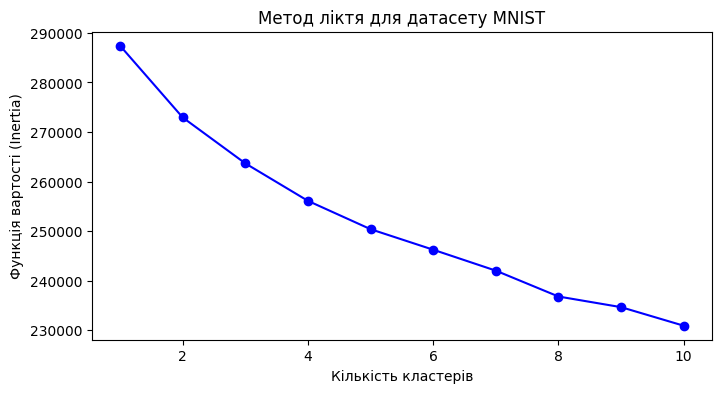

In [40]:
# Побудова графіка "ліктя"
plt.figure(figsize=(8, 4))
plt.plot(K, distortions_mnist, 'bo-')
plt.xlabel('Кількість кластерів')
plt.ylabel('Функція вартості (Inertia)')
plt.title('Метод ліктя для датасету MNIST')
plt.show()

# Вибір оптимальної кількості кластерів (наприклад, 10)
optimal_clusters_mnist = 10
kmeans_mnist = KMeans(n_clusters=optimal_clusters_mnist, random_state=0)
labels_mnist = kmeans_mnist.fit_predict(X_mnist)

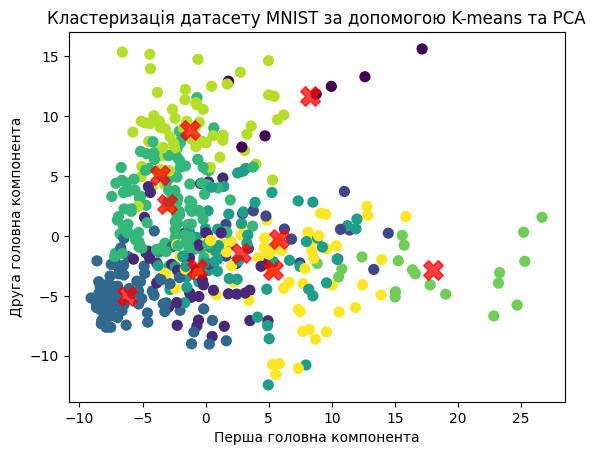

In [39]:
# Використання PCA для зменшення розмірності до 2D
pca = PCA(n_components=2)
X_pca_mnist = pca.fit_transform(X_mnist)

# Візуалізація результатів кластеризації для датасету MNIST
plt.scatter(X_pca_mnist[:, 0], X_pca_mnist[:, 1], c=labels_mnist, s=50, cmap='viridis')
centers_mnist = pca.transform(kmeans_mnist.cluster_centers_)
plt.scatter(centers_mnist[:, 0], centers_mnist[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('Кластеризація датасету MNIST за допомогою K-means та PCA')
plt.xlabel('Перша головна компонента')
plt.ylabel('Друга головна компонента')
plt.show()